In [1]:
import matplotlib.pyplot
import osmnx as ox
import geopandas as gdp
import geopy as gy

In [4]:
place_name = "Poland"
area = ox.geocode_to_gdf(place_name)
area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((14.06964 54.27764, 14.16802 54.23880...",55.03605,49.002047,24.145783,14.069639,188951936,relation,49715,52.215933,19.134422,boundary,administrative,4,0.852586,country,Poland,Poland


<Axes: >

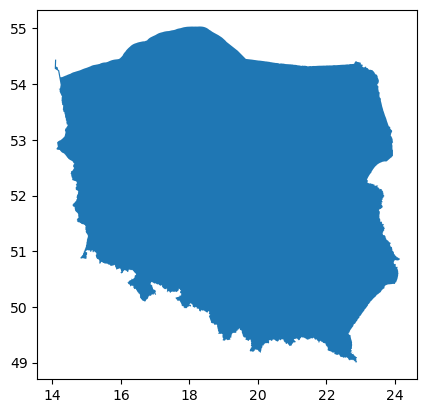

In [14]:
area.plot()

Place name: Kalkbro, Strängnäs kommun, Södermanlands län, 646 96, Sverige


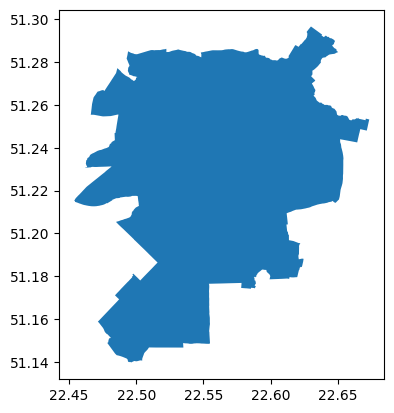

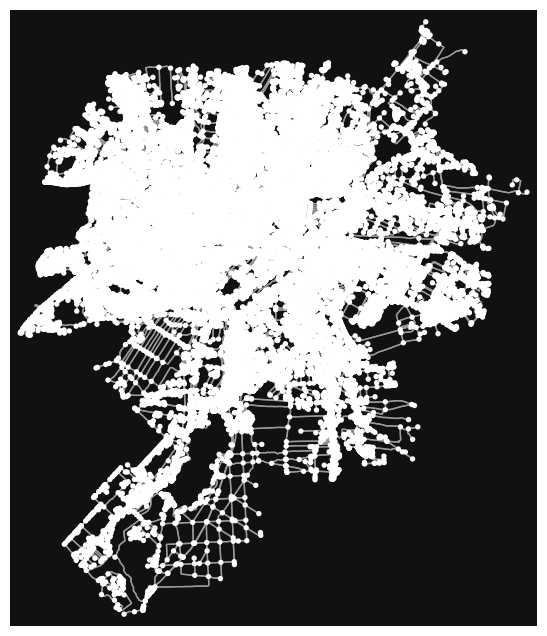

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [7]:
geolocator = gy.Nominatim(user_agent="place_name_locator")

latitude = 59.22
longitude = 17.00

location = geolocator.reverse((latitude, longitude), exactly_one=True)

if location:
    place_name = location.address
    print(f"Place name: {place_name}")
else:
    print("Place name not found.")

place_name = "Lublin, Poland"

graph = ox.graph_from_place(place_name)


area = ox.geocode_to_gdf(place_name)
area.plot()


ox.plot_graph(ox.project_graph(graph))

In [7]:
import osmnx as ox
import networkx as nx
from geopy.geocoders import Nominatim

# Specify the source and destination coordinates as latitude and longitude
source_coords = (52.5200, 13.4050)  # Example source coordinates
dest_coords = (52.5300, 13.4150)   # Example destination coordinates

# Initialize the Nominatim geocoder
geolocator = Nominatim(user_agent="shortest_path_calculator")

# Use reverse geocoding to find the nearest network nodes to the specified coordinates
source_location = geolocator.reverse(source_coords, exactly_one=True)
dest_location = geolocator.reverse(dest_coords, exactly_one=True)

if source_location and dest_location:
    source_address = source_location.address
    dest_address = dest_location.address

    print(f"Source location: {source_address}")
    print(f"Destination location: {dest_address}")

    # Use osmnx to retrieve the street network for the specified area
    graph = ox.graph_from_point(source_coords, dist=20000, network_type='all')

    # Find the nearest network nodes to the source and destination locations
    orig = ox.distance.nearest_nodes(graph, source_coords[1], source_coords[0])
    dest = ox.distance.nearest_nodes(graph, dest_coords[1], dest_coords[0])

    # Calculate the shortest path using networkx
    route = nx.shortest_path(graph, orig, dest, weight='length')

    # Print the shortest path
    print("Shortest path nodes:", route)

else:
    print("Location not found.")

Source location: Spandauer Straße, Spandauer Vorstadt, Mitte, Berlin, 10178, Deutschland
Destination location: 28, Saarbrücker Straße, Prenzlauer Berg, Pankow, Berlin, 10405, Deutschland


KeyboardInterrupt: 

Source location: Boulevard Hassan Gouled شارع حسن جوليد, Cité Arhiba حي أرهيبا, Quartier 7 bis / حارة 7 أ, Balbala بلبالا, Djibouti جيبوتي
Destination location: Route nationale 1, Oueah وع, Ouéah وع, Arta عرتا, Djibouti جيبوتي
Boulevard Hassan Gouled شارع حسن جوليد, Cité Arhiba حي أرهيبا, Quartier 7 bis / حارة 7 أ, Balbala بلبالا, Djibouti جيبوتي


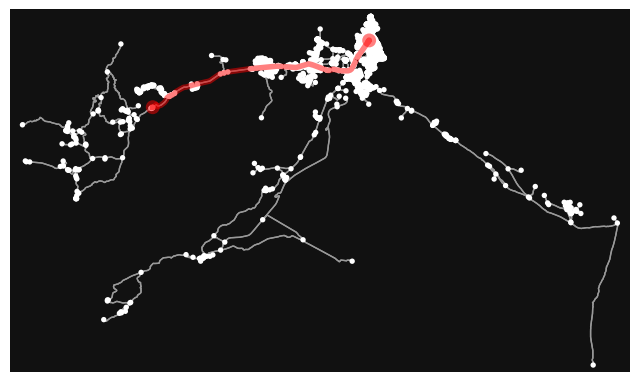

Shortest path nodes: [4738135772, 265071353, 4738135757, 3578144894, 265071364, 265071367, 1617802133, 4738135762, 265071338, 265071347, 5836902931, 339349411, 3583675663, 3590376875, 3583701131, 5887799101, 5812753011, 339349269, 5818382955, 2700540155, 339349267, 5887799099, 9217690890, 5829741277, 266165807, 339347421, 339347426, 5830238131, 5829741492, 339348398, 7041955777, 7041905493, 3789255958, 1616721942, 5519912231, 1616721586, 1616721553, 10973303100, 10973303096, 6151953899, 6151875885, 6151875886, 6120021280, 6120021284, 1616721567, 6151850058, 7192008791, 7043463380, 306130945, 1616721846, 7043360152, 6553400492, 5817759881, 5818046727, 5932173368, 5818046735, 1804671821, 5818046745, 5818046853, 5932173378, 5818046667, 5823578015, 5823578009, 5823577973, 2440719199, 5818632907, 5823578026, 1616721673, 4015178731, 1616721634, 1616721875, 1616721882, 1886947056, 5818644275, 5818644272, 3739061667, 2195708405, 5818346286, 3739295504, 3739295735, 5814925880, 5814925856, 58183

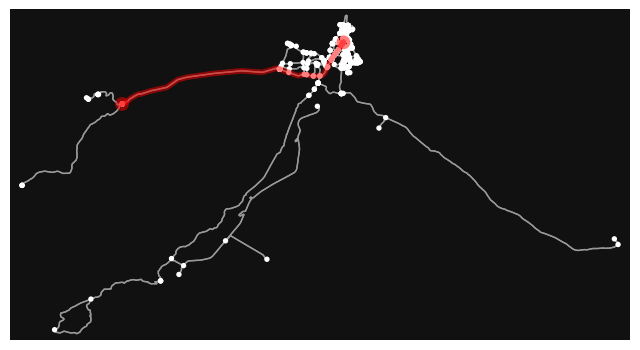

Shortest path nodes: [4738135772, 265071353, 4738135757, 3578144894, 265071364, 265071367, 1617802133, 4738135762, 265071338, 265071347, 5836902931, 339349411, 5887799101, 5812753011, 339349269, 5818382955, 2700540155, 339349267, 5887799099, 5829741277, 266165807, 339347421, 339347426, 5829741492, 339348398, 6151953899, 6151875885, 7192008791, 306130945, 1616721846, 1804671821, 1616721673, 4015178731, 1616721634, 1616721875, 1616721882, 1886947056, 683272529, 5896501445, 2164526786]
[32.514503000000005, True, False]
32.407739827112394


In [31]:
## example punkt (11.5003, 42.8611)

import osmnx as ox
import networkx as nx
from geopy.geocoders import Nominatim
import pyproj

def count_lenght(route:list, graph):
    # Initialize the total length of the road
    total_length = 0.0

    # Iterate through the nodes in the route to calculate the length of the road
    for i in range(len(route) - 1):
        start_node = route[i]
        end_node = route[i + 1]

        # Get the length (in meters) of the edge between the current and next node
        edge_length = graph[start_node][end_node][0].get('length', 0)

        # Accumulate the edge length to the total length
        total_length += edge_length

    return total_length/1000

def get_route(source_coords:tuple, dest_coords:tuple, is_truck:bool) -> list:
    # Specify the source and destination coordinates as latitude and longitude

    # Initialize the Nominatim geocoder
    geolocator = Nominatim(user_agent="shortest_path_calculator")

    # Use reverse geocoding to find the nearest network nodes to the specified coordinates
    source_location = geolocator.reverse(source_coords, exactly_one=True)
    dest_location = geolocator.reverse(dest_coords, exactly_one=True)

    if source_location and dest_location:
        source_address = source_location.address
        dest_address = dest_location.address
        
        print(f"Source location: {source_address}")
        print(f"Destination location: {dest_address}")

        trucky = is_truck

        if trucky:
            filter = "['highway'~'motorway|trunk|primary|secondary|tertiary']"
        else:
            filter = "['highway'~'motorway|trunk|primary|secondary|tertiary|service|track']"
            
        # Use osmnx to retrieve the street network for the specified area
        print(source_address)
        graph = ox.graph_from_point(source_coords, dist=50000, network_type='drive', custom_filter=filter)

        # Find the nearest network nodes to the source and destination locations
        orig = ox.distance.nearest_nodes(graph, source_coords[1], source_coords[0])
        dest = ox.distance.nearest_nodes(graph, dest_coords[1], dest_coords[0])

        # Calculate the shortest path using networkx
        route = nx.shortest_path(graph, orig, dest, weight='length')

        ox.plot.plot_graph_route(graph, route)

        # Print the shortest path
        print("Shortest path nodes:", route)

    else:
        print("Location not found.")

    return route, graph

def count_eqlidean_lenght(source_coords, dest_coords):
    
    wgs84 = pyproj.CRS("EPSG:4326")
    utm = pyproj.CRS("EPSG:32633")
    
    x1, y1, x2, y2 = source_coords[0], source_coords[1], dest_coords[0], dest_coords[1]
    
    transformer = pyproj.Transformer.from_crs(wgs84, utm, always_xy=True)
    
    x1, y1 =  transformer.transform(x1, y1)
    
    x2, y2 =  transformer.transform(x2, y2)
    
    length = ox.distance.euclidean(x1, y1, x2, y2)

    return length/1000

def shortest_path(source_coords:tuple, dest_coords:tuple) -> list:
    is_truckacess = False
    is_straightline = False

    route, graph = get_route(source_coords, dest_coords, is_truckacess)
    length = count_lenght(route, graph)

    return [length, is_truckacess, is_straightline]

def truckAccesiblePath(source_coords:tuple, dest_coords:tuple) -> list:
    is_truckacess = True
    is_straightline = False

    route, graph = get_route(source_coords, dest_coords, is_truckacess)
    length = count_lenght(route, graph)

    return [length, is_truckacess, is_straightline]

def euklidesPath(source_coords, dest_coords):
    is_truckacess = False
    is_straightline = True
    
    return 0

source = (11.5874,43.1448)
dest = (11.5018,42.8601)

print(shortest_path(source, dest))

print(truckAccesiblePath(source, dest))

print(count_eqlidean_lenght(source, dest))